In [1]:
#Import dependencies
import sqlalchemy
from sqlalchemy import create_engine, func, inspect, desc
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column,Integer,String,Float
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reflect tables into SQLAlchemy ORM

In [2]:
#Database path
db_path = "Resources/hawaii.sqlite"

#Creating engine for db
engine = create_engine(f'sqlite:///{db_path}')

In [3]:
#Reflecting existing tables in the database
Base = automap_base()
Base.prepare(engine, reflect=True)

#Displaying the base.classes.keys
Base.classes.keys()

['measurement', 'station']

In [4]:
#Creating a class for each key
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
#Creating an inspector to get tables columns
inspector = inspect(engine)

#measurement table's columns
columns = inspector.get_columns("measurement")
for column in columns:
    print(column)
    
#station table's columns
print("\n")
columns = inspector.get_columns("station")
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 

In [6]:
#Creating a session for querying the db
session = Session(bind=engine)

# Precipitation Analysis

In [7]:
#Retrieving the earliest record precipitation data
earliest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(earliest_date)

('2017-08-23',)


In [8]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


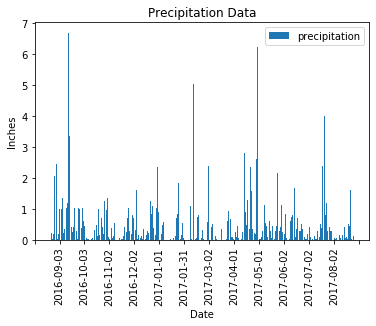

In [18]:
#Retrieving the last 12 months of precipitation data and saving it into a pandas dataframe

prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date)
prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.fillna(0)

#Plotting precipitation data
#precipitation = plt.bar(prcp_df['date'], prcp_df['prcp'], label='precipitation')
x = prcp_df['date']
y = prcp_df['prcp']


fig, ax = plt.subplots()
ax.bar(x,y, label='precipitation')
start, end = ax.get_xlim()
plt.xticks(np.arange(start, end, step = 30))
plt.xticks(rotation = 90)


plt.title("Precipitation Data")
plt.legend()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [10]:
#summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Station Analysis

In [11]:
#NUmber of different stations
station_count = session.query(Measurement.station).distinct(Measurement.station).count()
print(station_count)

9


In [12]:
#Most active station
active_stations = session.query(Measurement.station,func.count(Measurement.station).label('Observations count'))\
                                .group_by(Measurement.station).order_by(desc('Observations count'))
    
for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


### The USC00519281 is the most active station with 2772 observations

In [13]:
#Last 12 months of temperature observation data
tobs_data = session.query(Measurement).filter(Measurement.date >= query_date)
for record in tobs_data:
    print(record.date, record.tobs)

2016-08-23 81.0
2016-08-24 79.0
2016-08-25 80.0
2016-08-26 79.0
2016-08-27 77.0
2016-08-28 78.0
2016-08-29 78.0
2016-08-30 79.0
2016-08-31 80.0
2016-09-01 81.0
2016-09-02 80.0
2016-09-03 79.0
2016-09-04 75.0
2016-09-05 79.0
2016-09-06 76.0
2016-09-07 76.0
2016-09-08 80.0
2016-09-09 79.0
2016-09-10 78.0
2016-09-11 76.0
2016-09-12 78.0
2016-09-13 78.0
2016-09-14 75.0
2016-09-15 79.0
2016-09-16 80.0
2016-09-17 79.0
2016-09-18 81.0
2016-09-19 77.0
2016-09-20 77.0
2016-09-21 78.0
2016-09-22 76.0
2016-09-23 82.0
2016-09-24 81.0
2016-09-25 78.0
2016-09-26 80.0
2016-09-27 80.0
2016-09-28 79.0
2016-09-29 80.0
2016-09-30 80.0
2016-10-01 80.0
2016-10-02 79.0
2016-10-03 79.0
2016-10-04 79.0
2016-10-05 80.0
2016-10-06 80.0
2016-10-07 79.0
2016-10-08 78.0
2016-10-09 76.0
2016-10-10 75.0
2016-10-11 80.0
2016-10-12 80.0
2016-10-13 79.0
2016-10-14 80.0
2016-10-15 79.0
2016-10-16 78.0
2016-10-17 78.0
2016-10-18 80.0
2016-10-19 81.0
2016-10-20 79.0
2016-10-21 77.0
2016-10-22 79.0
2016-10-23 78.0
2016-10-

2017-06-06 80.0
2017-06-07 81.0
2017-06-08 79.0
2017-06-09 81.0
2017-06-10 78.0
2017-06-11 79.0
2017-06-12 79.0
2017-06-13 75.0
2017-06-14 79.0
2017-06-15 78.0
2017-06-16 80.0
2017-06-17 78.0
2017-06-18 77.0
2017-06-19 78.0
2017-06-20 79.0
2017-06-23 76.0
2017-06-26 80.0
2017-06-29 76.0
2017-06-30 81.0
2017-07-03 81.0
2017-07-05 81.0
2017-07-07 77.0
2017-07-08 81.0
2017-07-09 82.0
2017-07-10 80.0
2017-07-11 79.0
2017-07-12 81.0
2017-07-13 81.0
2017-07-14 80.0
2017-07-15 82.0
2017-07-16 79.0
2017-07-17 82.0
2017-07-18 82.0
2017-07-19 80.0
2017-07-20 79.0
2017-07-21 79.0
2017-07-22 80.0
2017-07-23 82.0
2017-07-24 79.0
2017-07-25 80.0
2017-07-26 79.0
2017-07-27 80.0
2017-07-28 81.0
2017-07-29 82.0
2017-07-31 81.0
2017-08-01 74.0
2017-08-02 80.0
2017-08-03 81.0
2017-08-04 81.0
2017-08-06 82.0
2017-08-07 81.0
2017-08-08 78.0
2017-08-09 81.0
2017-08-10 81.0
2017-08-11 81.0
2017-08-13 81.0
2017-08-14 81.0
2017-08-15 82.0
2017-08-16 82.0
2017-08-17 78.0
2017-08-18 77.0
2017-08-19 80.0
2017-08-

2017-04-21 70.0
2017-04-22 73.0
2017-04-23 70.0
2017-04-24 75.0
2017-04-25 74.0
2017-04-26 77.0
2017-04-27 76.0
2017-04-28 71.0
2017-04-29 68.0
2017-04-30 58.0
2017-05-01 73.0
2017-05-02 79.0
2017-05-04 74.0
2017-05-05 74.0
2017-05-06 74.0
2017-05-07 70.0
2017-05-08 66.0
2017-05-09 72.0
2017-05-10 72.0
2017-05-11 78.0
2017-05-12 70.0
2017-05-13 71.0
2017-05-14 70.0
2017-05-15 72.0
2017-05-16 71.0
2017-05-17 71.0
2017-05-18 69.0
2017-05-20 70.0
2017-05-21 69.0
2017-05-22 72.0
2017-05-23 69.0
2017-05-24 70.0
2017-05-25 75.0
2017-05-26 72.0
2017-05-27 72.0
2017-05-28 73.0
2017-05-30 72.0
2017-06-01 74.0
2017-06-03 74.0
2017-06-04 77.0
2017-06-05 74.0
2017-06-06 74.0
2017-06-07 79.0
2017-06-08 75.0
2017-06-10 72.0
2017-06-11 76.0
2017-06-12 74.0
2017-06-13 73.0
2017-06-14 74.0
2017-06-15 77.0
2017-06-16 74.0
2017-06-17 72.0
2017-06-18 77.0
2017-06-19 76.0
2017-06-20 74.0
2017-06-21 75.0
2017-06-22 76.0
2017-06-23 71.0
2017-06-24 73.0
2017-06-25 79.0
2017-06-26 79.0
2017-06-27 74.0
2017-06-

In [14]:
# Using the station id from the previous query, the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
tobs_min = session.query(Measurement.date, Measurement.station, func.min(Measurement.tobs).label('min_temp'),\
                                                                func.max(Measurement.tobs).label('max_temp'),\
                                                                func.avg(Measurement.tobs).label('avg_temp')).\
                            filter(Measurement.station == 'USC00519281')
for tobs in tobs_min:
    print(f'Lowest Temperature: {tobs.date}, {tobs.station}, {tobs.min_temp}')
    print(f'Highest Temperature: {tobs.date}, {tobs.station}, {tobs.max_temp}')
    print(f'Average Temperature: {tobs.date}, {tobs.station}, {round(tobs.avg_temp, 2)}')

Lowest Temperature: 2015-09-10, USC00519281, 54.0
Highest Temperature: 2015-09-10, USC00519281, 85.0
Average Temperature: 2015-09-10, USC00519281, 71.66


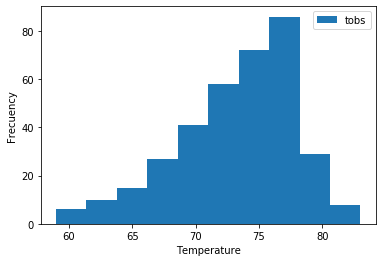

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_tobs = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date >= query_date).\
                                            filter(Measurement.station == 'USC00519281')

tobs_df = pd.DataFrame(last_tobs)
plt.hist(tobs_df['tobs'], label='tobs')
plt.legend()
plt.ylabel('Frecuency')
plt.xlabel('Temperature')
plt.show()

In [16]:
#Closing session
session.close()